In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy import stats

In [3]:
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

In [4]:
# 讀取數據並進行分類處理
from google.colab import drive
drive.mount("/content/drive")
fpath = '/content/drive/My Drive/Colab Notebooks/期末/fitness analysis.csv'#檔案路徑
data = pd.read_csv(fpath, sep=",")
product_data = pd.DataFrame(data)

product_data.head()

Mounted at /content/drive


,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,2019/07/04 5:43:35 AM GMT+5:30,Anusha,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,2019/07/04 5:44:29 AM GMT+5:30,Nikkitha,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit


In [5]:
product_data = product_data.dropna() #刪除缺失值
#檢查是否有缺失值
print(product_data.isnull().sum()) 
#利用平均值填補缺失值
product_data = product_data.fillna(product_data.mean())
#檢查是否還有缺失值
print(product_data.isnull().sum())

Timestamp                                                                                                                0
Your name                                                                                                                0
Your gender                                                                                                              0
Your age                                                                                                                 0
How important is exercise to you ?                                                                                       0
How do you describe your current level of fitness ?                                                                      0
How often do you exercise?                                                                                               0
What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)              0
What form(s) of 

<ipython-input-5-358b669273ab>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  product_data = product_data.fillna(product_data.mean())


In [6]:
#刪除不需要的資料
product_data.drop('Timestamp', axis=1, inplace=True)
product_data.drop('Your name ', axis=1, inplace=True)

In [7]:
#分類各資料內數值
for column in product_data:
    print(f"{column} : {product_data[column].unique()}")

Your gender  : ['Female' 'Male']
Your age  : ['19 to 25' '15 to 18' '40 and above' '30 to 40' '26 to 30']
How important is exercise to you ? : [2 4 3 5 1]
How do you describe your current level of fitness ? : ['Good' 'Very good' 'Unfit' 'Average' 'Perfect']
How often do you exercise? : ['Never' '1 to 2 times a week' '3 to 4 times a week' 'Everyday'
 '2 to 3 times a week' '5 to 6 times a week']
What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply) : ["I don't have enough time;I can't stay motivated"
 "I don't have enough time;I'll become too tired" "I can't stay motivated"
 "I don't have enough time" 'I exercise regularly with no barriers'
 "I don't really enjoy exercising"
 "I can't stay motivated;I don't really enjoy exercising"
 "I don't have enough time;I can't stay motivated;I'll become too tired;I don't really enjoy exercising"
 "I don't have enough time;I exercise regularly with no barriers"
 "I don't have enough time;I can't 

In [8]:
#改變index名字
new_cols=['Gender','Age','Important_score','Fitness_level','Exercise_frequency','Exercise_barrier','Exercise_form','People_number','Time','Duration_of_time','Healthy_diet','Healthy_diet_barrier','Healthy_score','Recommend_friend','Purchase_equipment','Motivates']
column_reference=pd.DataFrame(new_cols,product_data.columns)
product_data.columns=new_cols

# 改性別Gender，將 'Male' 改為 1，將 'Female' 改為 2
product_data.loc[product_data['Gender'] == 'Male', 'Gender'] = 1
product_data.loc[product_data['Gender'] == 'Female', 'Gender'] = 2

# 改年齡Age，使用正則表達式擷取年齡中的數字部分
product_data['Age'] = product_data['Age'].str.extract(r'(\d+)')
# 將字串轉換為數字
product_data['Age'] = product_data['Age'].astype(int)

# 改運動頻率Exercise_frequency
product_data.loc[product_data['Exercise_frequency'] == 'Never', 'Exercise_frequency'] = 0
product_data.loc[product_data['Exercise_frequency'] == 'Everyday', 'Exercise_frequency'] = 7
product_data['Exercise_frequency'] = product_data['Exercise_frequency'].str.extract(r'(\d+)')
product_data['Exercise_frequency'] = product_data['Exercise_frequency'].fillna(0)  # 將缺失值填充為0
product_data['Exercise_frequency'] = product_data['Exercise_frequency'].astype(int)

#改運動程度Fitness_level
product_data.loc[product_data['Fitness_level'] == 'Unfit', 'Fitness_level'] = 1
product_data.loc[product_data['Fitness_level'] == 'Average', 'Fitness_level'] = 2
product_data.loc[product_data['Fitness_level'] == 'Good', 'Fitness_level'] = 3
product_data.loc[product_data['Fitness_level'] == 'Very good', 'Fitness_level'] = 4
product_data.loc[product_data['Fitness_level'] == 'Perfect', 'Fitness_level'] = 5

# 改運動長度Duration_of_time
product_data.loc[product_data['Duration_of_time'] == "I don't really exercise", 'Duration_of_time'] = 0
product_data.loc[product_data['Duration_of_time'] == '30 minutes', 'Duration_of_time'] = 30
product_data.loc[product_data['Duration_of_time'] == '1 hour', 'Duration_of_time'] = 60
product_data.loc[product_data['Duration_of_time'] == '2 hours', 'Duration_of_time'] = 120
product_data.loc[product_data['Duration_of_time'] == '3 hours and above', 'Duration_of_time'] = 180

# 改是否有在吃健康餐Healthy_diet :Yes -> 1, No ->0
product_data.loc[product_data['Healthy_diet'] == 'No', 'Healthy_diet'] = 0
product_data.loc[product_data['Healthy_diet'] == 'Yes', 'Healthy_diet'] = 1
product_data.loc[product_data['Healthy_diet'] == 'Not always', 'Healthy_diet'] = 2

# 改是否介紹朋友Recommend_friend :Yes -> 1, No ->0
product_data.loc[product_data['Recommend_friend'] == 'No', 'Recommend_friend'] = 0
product_data.loc[product_data['Recommend_friend'] == 'Yes', 'Recommend_friend'] = 1

# 改是否購買健身器材Purchase_equipment :Yes -> 1, No ->0
product_data.loc[product_data['Purchase_equipment'] == 'No', 'Purchase_equipment'] = 0
product_data.loc[product_data['Purchase_equipment'] == 'Yes', 'Purchase_equipment'] = 1

In [9]:
product_data

,Gender,Age,Important_score,Fitness_level,Exercise_frequency,Exercise_barrier,Exercise_form,People_number,Time,Duration_of_time,Healthy_diet,Healthy_diet_barrier,Healthy_score,Recommend_friend,Purchase_equipment,Motivates
0,2,19,2,3,0,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,0,2,Ease of access to fast food;Temptation and cra...,3,1,0,I'm sorry ... I'm not really interested in exe...
1,2,19,4,4,0,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,0,2,Ease of access to fast food;Temptation and cra...,4,1,0,I want to be fit;I want to be flexible;I want ...
2,2,15,3,3,1,I can't stay motivated,Walking or jogging,Alone,Early morning,30,2,Temptation and cravings,4,1,1,I want to be fit
3,2,15,4,3,3,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,60,1,Temptation and cravings,4,1,0,I want to be fit;I want to lose weight
4,2,19,3,1,0,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,0,1,Ease of access to fast food;Temptation and cra...,4,1,0,I want to be fit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,2,40,3,5,1,I don't have enough time,Walking or jogging,Alone,Evening,30,2,I have a balanced diet,4,1,1,I want to be flexible
541,2,40,1,2,3,I exercise regularly with no barriers,Walking or jogging;Gym;Swimming,I don't really exercise,Early morning,120,1,Lack of time,3,1,1,I want to be fit;I want to relieve stress
542,2,19,4,2,1,I can't stay motivated,Walking or jogging;Yoga,Alone,Early morning,30,2,Ease of access to fast food;Temptation and cra...,4,1,0,I want to lose weight;I want to be flexible
543,1,19,3,3,3,I don't really enjoy exercising,Walking or jogging,Alone,Evening,30,2,Temptation and cravings,3,1,0,I want to relieve stress


In [10]:
#查看object型態資料內容

object_col = [product_data.columns[index] for index, dtype in enumerate(product_data.dtypes) if dtype == 'object']#將dtype為object的抓出來
object_col

for column in object_col:
    print(f"{column} : {product_data[column].unique()}")

Gender : [2 1]
Fitness_level : [3 4 1 2 5]
Exercise_barrier : ["I don't have enough time;I can't stay motivated"
 "I don't have enough time;I'll become too tired" "I can't stay motivated"
 "I don't have enough time" 'I exercise regularly with no barriers'
 "I don't really enjoy exercising"
 "I can't stay motivated;I don't really enjoy exercising"
 "I don't have enough time;I can't stay motivated;I'll become too tired;I don't really enjoy exercising"
 "I don't have enough time;I exercise regularly with no barriers"
 "I don't have enough time;I can't stay motivated;I'll become too tired;Less stamina"
 "I don't have enough time;I'll become too tired;I have an injury"
 "I don't have enough time;I'll become too tired;I don't really enjoy exercising"
 "I'll become too tired"
 "I don't have enough time;I can't stay motivated;I'll become too tired;I have an injury"
 "I'll become too tired;I don't really enjoy exercising"
 "I can't stay motivated;I'll become too tired"
 "I don't have enough tim

In [11]:
exercises_list={}
for selected_options in product_data['Exercise_form']:
    for exercise in selected_options.split(";"):
        if exercise in exercises_list:
            exercises_list[exercise]+=1
        else:
            exercises_list[exercise]=1

exercises_list

{"I don't really exercise": 90,
 'Walking or jogging': 324,
 'Swimming': 41,
 'Gym': 140,
 'Lifting weights': 47,
 'Yoga': 81,
 'Team sport': 93,
 'Zumba dance': 33}

In [12]:
sorted_list={}
for i in sorted(exercises_list,key=exercises_list.get,reverse=True):
    sorted_list[i]=exercises_list[i]

In [13]:
count=sum(sorted_list.values())
for i in sorted_list:
    sorted_list[i]=(sorted_list[i]/count)*100

In [14]:
sorted_list

{'Walking or jogging': 38.16254416961131,
 'Gym': 16.489988221436985,
 'Team sport': 10.954063604240282,
 "I don't really exercise": 10.60070671378092,
 'Yoga': 9.540636042402827,
 'Lifting weights': 5.535924617196701,
 'Swimming': 4.829210836277975,
 'Zumba dance': 3.8869257950530036}

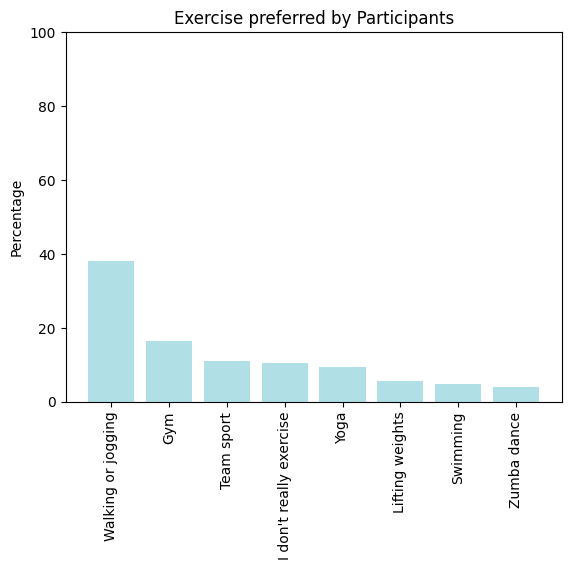

In [15]:
#直方圖
plt.bar(sorted_list.keys(),sorted_list.values(),color='#b0e0e6')
plt.xticks(rotation=90)
plt.title("Exercise preferred by Participants")
plt.ylabel("Percentage")
plt.ylim(0,100)
plt.show()

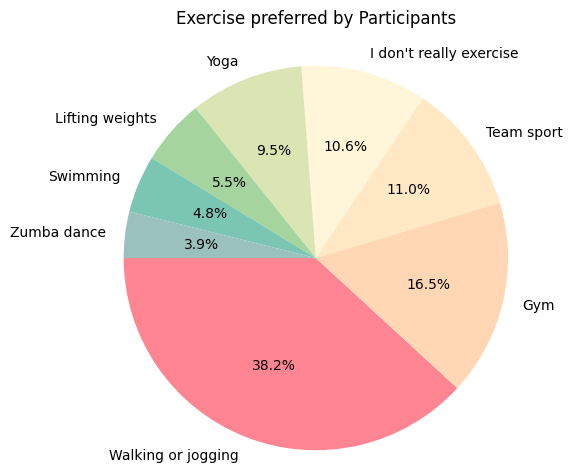

In [16]:
#圓餅圖
colors = ['#FF8593', '#FFD7B5', '#FFE8C3', '#FFF5D8','#DBE5B3','#A6D49F','#7BC6B3','#9BC1BC']

plt.title("Exercise preferred by Participants\n\n")
plt.pie(sorted_list.values(), labels= sorted_list.keys(),colors=colors,autopct='%.1f%%',startangle=180,radius=1.3)
plt.show()

In [17]:
#devide Motivates list

motivation_list={}
for selected_options in product_data['Motivates']:
    for motivation in selected_options.split(";"):
        if motivation in motivation_list:
            motivation_list[motivation]+=1
        else:
            motivation_list[motivation]=1

In [18]:
motivation_list

{"I'm sorry ... I'm not really interested in exercising": 42,
 'I want to be fit': 341,
 'I want to be flexible': 173,
 'I want to relieve stress': 173,
 'I want to lose weight': 198,
 'I want to increase muscle mass and strength': 89,
 'I want to achieve a sporting goal': 54,
 'Doing exercises prevents many diseases.So yeah saves a lot of money .': 1,
 'Exercising gives you discipline and focus and removed bad thoughts from your mind.': 1,
 'Control Diabetes ': 1,
 'To maintain healthy body and mind': 1,
 'I want to think clearly and I want to play cricket with my grandkids': 1,
 'I dont wanna gain weight😉': 1,
 'Going to class on time 😉': 1,
 'See the answer to what barriers, if any, prevent you from exercising  regularly ': 1,
 'My dad motivates me ': 1,
 'Reaching class on time 😅': 1,
 'Personal reasons': 1,
 'Not doing exercise': 1,
 'I want to look young and think young': 1,
 'Gotta get that alcohol and **** out of the system': 1}

In [19]:
top_5_motivation=pd.DataFrame.from_dict(motivation_list.items()).sort_values(by=1,ascending=False)[:5]

In [20]:
top_5_motivation[0]=top_5_motivation[0].apply(lambda x:x.replace("I want to ",""))

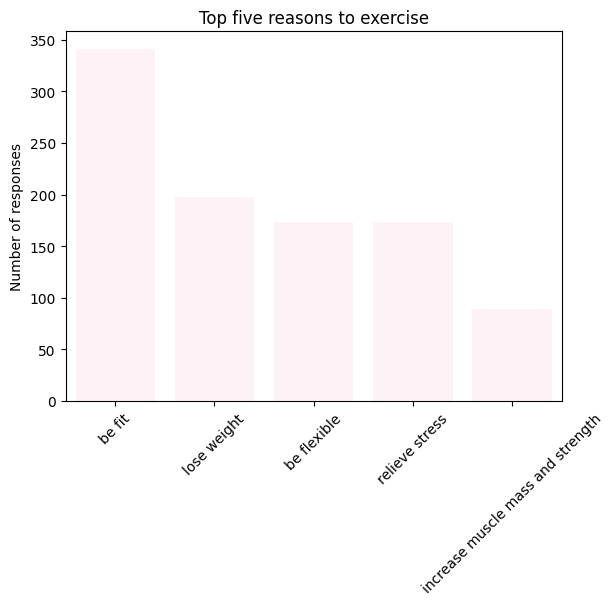

In [21]:
sns.barplot(x=0,y=1,data=top_5_motivation,color = '#fff0f5')
plt.xticks(rotation=45)
plt.ylabel("Number of responses")
plt.title("Top five reasons to exercise")
plt.xlabel("")
plt.show()

In [22]:
#devide Healthy diet barrier list
Exercise_barrier_list={}
for selected_options in product_data['Exercise_barrier']:
    for Exercise_barrier in selected_options.split(";"):
        if Exercise_barrier in Exercise_barrier_list:
            Exercise_barrier_list[Exercise_barrier]+=1
        else:
            Exercise_barrier_list[Exercise_barrier]=1

In [23]:
Exercise_barrier_list

{"I don't have enough time": 290,
 "I can't stay motivated": 178,
 "I'll become too tired": 112,
 'I exercise regularly with no barriers': 67,
 "I don't really enjoy exercising": 59,
 'Less stamina': 1,
 'I have an injury': 31,
 'I am not regular in anything': 1,
 'I am lazy': 1,
 'Laziness ': 2,
 "I'm too lazy": 1,
 'Laziness': 3,
 'Lazy': 1,
 'No gym near me': 1,
 'Travel': 1,
 'Allergies': 1,
 'I always busy with my regular works': 1,
 "My friends don't come ": 1,
 'Laziness mostly ': 2,
 'Travel time I skip': 1}

In [24]:
top_6__barrier=pd.DataFrame.from_dict(Exercise_barrier_list.items()).sort_values(by=1,ascending=False)[:6]
top_6__barrier

,0,1
0,I don't have enough time,290
1,I can't stay motivated,178
2,I'll become too tired,112
3,I exercise regularly with no barriers,67
4,I don't really enjoy exercising,59
6,I have an injury,31


In [25]:
top_6__barrier[0]=top_6__barrier[0].apply(lambda x:x.replace("I don't have enough time","Lack of Time")
                                                    .replace("I can't stay motivated","Less motivated")
                                                    .replace("I'll ","")
                                                    .replace("I exercise regularly with no barriers","No barriers")
                                                    .replace("I don't really enjoy exercising","Lack of exercise passion")
                                                    .replace("I have an injury"," Having injury"))

In [26]:
top_6__barrier

,0,1
0,Lack of Time,290
1,Less motivated,178
2,become too tired,112
3,No barriers,67
4,Lack of exercise passion,59
6,Having injury,31


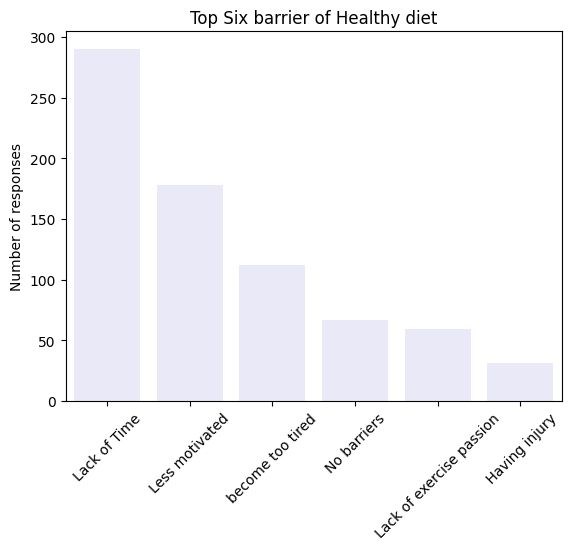

In [27]:
sns.barplot(x=0,y=1,data=top_6__barrier,color = '#e6e6fa')
plt.xticks(rotation=45)
plt.ylabel("Number of responses")
plt.title("Top Six barrier of Healthy diet")
plt.xlabel("")
plt.show()

In [28]:
#複製一個資料表備用

pd_copy = product_data.copy()

### 除了 Top Six barrier,其他全部刪除 ###

# Motivates
top_6_motivated_list = ["I want to be fit","I want to be flexible","I want to relieve stress","I want to lose weight","I want to increase muscle mass and strength"," want to achieve a sporting goal"]
pd_copy = pd_copy[pd_copy['Motivates'].isin(top_6_motivated_list)]


# Exercise_barrier
top_6_barrier_list = ["I don't have enough time","I can't stay motivated","I'll become too tired","I exercise regularly with no barriers","I don't really enjoy exercising","I have an injury"]
pd_copy = pd_copy[pd_copy['Exercise_barrier'].isin(top_6_barrier_list)]

In [29]:
### 更改value Name ###

# Motivates
pd_copy['Motivates'] = pd_copy['Motivates'].apply(lambda x:x.replace("I want to ",""))


#Exercise_barrier
pd_copy['Exercise_barrier'] = pd_copy['Exercise_barrier'].apply(lambda x:x.replace("I don't have enough time","Lack of Time")
                                                                          .replace("I can't stay motivated","Less motivated")
                                                                          .replace("I'll ","")
                                                                          .replace("I exercise regularly with no barriers","No barriers")
                                                                          .replace("I don't really enjoy exercising","Lack of exercise passion")
                                                                          .replace("I have an injury","Having injury"))

pd_copy

,Gender,Age,Important_score,Fitness_level,Exercise_frequency,Exercise_barrier,Exercise_form,People_number,Time,Duration_of_time,Healthy_diet,Healthy_diet_barrier,Healthy_score,Recommend_friend,Purchase_equipment,Motivates
2,2,15,3,3,1,Less motivated,Walking or jogging,Alone,Early morning,30,2,Temptation and cravings,4,1,1,be fit
4,2,19,3,1,0,Less motivated,I don't really exercise,I don't really exercise,Evening,0,1,Ease of access to fast food;Temptation and cra...,4,1,0,be fit
5,2,40,5,2,3,No barriers,Walking or jogging;Yoga,With a group,Evening,60,2,Temptation and cravings,3,1,0,be flexible
6,1,40,3,3,1,Lack of exercise passion,Walking or jogging,Alone,Early morning,30,0,Temptation and cravings,3,0,0,be flexible
10,1,15,4,4,3,Lack of Time,Walking or jogging;Team sport,With a group,Early morning,60,1,Lack of time,4,1,1,be fit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,2,40,3,5,1,Lack of Time,Walking or jogging,Alone,Evening,30,2,I have a balanced diet,4,1,1,be flexible
538,2,40,3,5,1,Lack of Time,Walking or jogging,Alone,Evening,30,2,I have a balanced diet,4,1,1,be flexible
539,2,40,3,5,1,Lack of Time,Walking or jogging,Alone,Evening,30,2,I have a balanced diet,4,1,1,be flexible
540,2,40,3,5,1,Lack of Time,Walking or jogging,Alone,Evening,30,2,I have a balanced diet,4,1,1,be flexible


In [30]:
#文字轉dummy

#將非binary的文本資料轉為dummy變數
dummy = pd.concat([pd.get_dummies(pd_copy['Exercise_barrier']),
                   pd.get_dummies(pd_copy['Motivates']),
                   pd.get_dummies(pd_copy['Time']),],
                   axis = 1)

#轉好的資料放回去
pd_copy = pd.concat([pd_copy, dummy], axis = 1)
pd_copy.drop(['Exercise_barrier','Motivates','Time'] , axis = 1, inplace = True)

pd_copy.dropna()#以免有缺失
pd_copy

,Gender,Age,Important_score,Fitness_level,Exercise_frequency,Exercise_form,People_number,Duration_of_time,Healthy_diet,Healthy_diet_barrier,...,No barriers,become too tired,be fit,be flexible,increase muscle mass and strength,lose weight,relieve stress,Afternoon,Early morning,Evening
2,2,15,3,3,1,Walking or jogging,Alone,30,2,Temptation and cravings,...,0,0,1,0,0,0,0,0,1,0
4,2,19,3,1,0,I don't really exercise,I don't really exercise,0,1,Ease of access to fast food;Temptation and cra...,...,0,0,1,0,0,0,0,0,0,1
5,2,40,5,2,3,Walking or jogging;Yoga,With a group,60,2,Temptation and cravings,...,1,0,0,1,0,0,0,0,0,1
6,1,40,3,3,1,Walking or jogging,Alone,30,0,Temptation and cravings,...,0,0,0,1,0,0,0,0,1,0
10,1,15,4,4,3,Walking or jogging;Team sport,With a group,60,1,Lack of time,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,2,40,3,5,1,Walking or jogging,Alone,30,2,I have a balanced diet,...,0,0,0,1,0,0,0,0,0,1
538,2,40,3,5,1,Walking or jogging,Alone,30,2,I have a balanced diet,...,0,0,0,1,0,0,0,0,0,1
539,2,40,3,5,1,Walking or jogging,Alone,30,2,I have a balanced diet,...,0,0,0,1,0,0,0,0,0,1
540,2,40,3,5,1,Walking or jogging,Alone,30,2,I have a balanced diet,...,0,0,0,1,0,0,0,0,0,1


In [31]:
#object型態欄位內的值本來就是數值
#將這種object型態值轉為int64

pd_copy['Gender'] = pd_copy['Gender'].astype('int64')
pd_copy['Fitness_level'] = pd_copy['Fitness_level'].astype('int64')
pd_copy['Duration_of_time'] = pd_copy['Duration_of_time'].astype('int64')
pd_copy['Healthy_diet'] = pd_copy['Healthy_diet'].astype('int64')

pd_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 2 to 543
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Gender                             175 non-null    int64 
 1   Age                                175 non-null    int64 
 2   Important_score                    175 non-null    int64 
 3   Fitness_level                      175 non-null    int64 
 4   Exercise_frequency                 175 non-null    int64 
 5   Exercise_form                      175 non-null    object
 6   People_number                      175 non-null    object
 7   Duration_of_time                   175 non-null    int64 
 8   Healthy_diet                       175 non-null    int64 
 9   Healthy_diet_barrier               175 non-null    object
 10  Healthy_score                      175 non-null    int64 
 11  Recommend_friend                   175 non-null    object
 12  Purchase

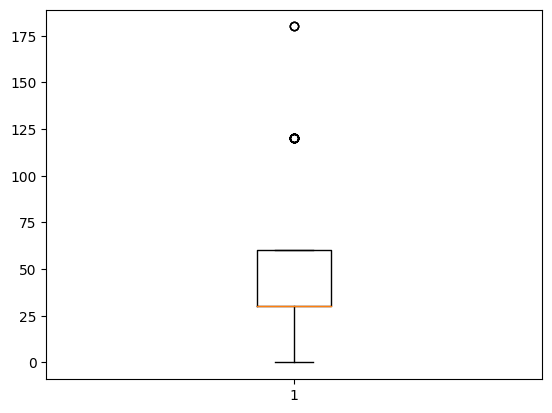

In [32]:
plt.boxplot(x='Duration_of_time',data = pd_copy)
plt.show()

In [33]:
# Removing outliers
def delete_outline(df,dfname):
    
    Q1 = np.percentile(pd_copy['Duration_of_time'], 25)
    Q3 = np.percentile(pd_copy['Duration_of_time'], 75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    
    filtered_df = df[(df[dfname] >= Q1 - threshold) & (df[dfname] <= Q3 + threshold)]
    
    return filtered_df

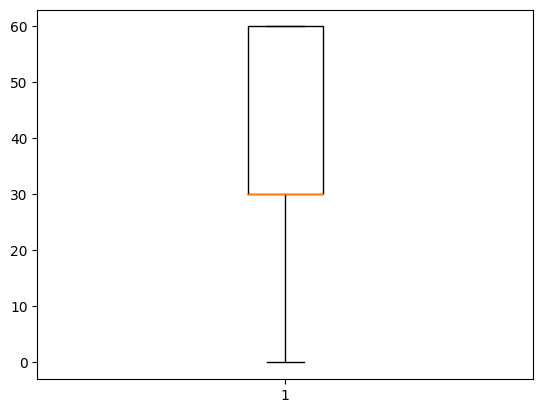

In [34]:
pd_copy = delete_outline(pd_copy,'Duration_of_time')

plt.boxplot(x='Duration_of_time',data = pd_copy)
plt.show()

In [35]:
pd_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 2 to 543
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Gender                             156 non-null    int64 
 1   Age                                156 non-null    int64 
 2   Important_score                    156 non-null    int64 
 3   Fitness_level                      156 non-null    int64 
 4   Exercise_frequency                 156 non-null    int64 
 5   Exercise_form                      156 non-null    object
 6   People_number                      156 non-null    object
 7   Duration_of_time                   156 non-null    int64 
 8   Healthy_diet                       156 non-null    int64 
 9   Healthy_diet_barrier               156 non-null    object
 10  Healthy_score                      156 non-null    int64 
 11  Recommend_friend                   156 non-null    object
 12  Purchase

<Axes: >

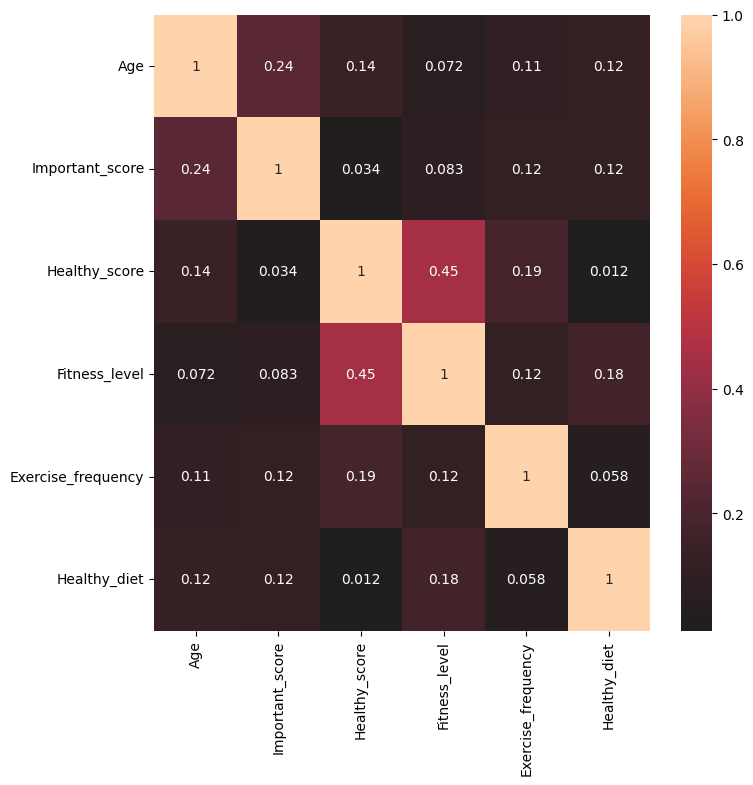

In [36]:
heatmap_list = ['Age','Important_score','Healthy_score','Fitness_level','Exercise_frequency','Healthy_diet']
heatmap_df = pd_copy[heatmap_list]

corrmat= heatmap_df.corr()
plt.figure(figsize=(8,8))  
sns.heatmap(corrmat,annot=True, center=0)

健身級別較高的人是否更傾向於認為自己更健康?

H0: 健身級別較高的人更傾向於認為自己更健康
H1: 健身級別較高的人不一定傾向於認為自己更健康

In [37]:
statistic, p_value = stats.ttest_ind(pd_copy['Fitness_level'], pd_copy['Healthy_diet'])
statistic, p_value

(13.138318071519924, 1.2011153850915424e-31)

In [38]:
alpha = 0.05 # 95%顯著水準

print("Statistic:", statistic)
print("P-value:", p_value)
print("\n")

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Statistic: 13.138318071519924
P-value: 1.2011153850915424e-31


Reject the null hypothesis


In [41]:
product_data.head()

,Gender,Age,Important_score,Fitness_level,Exercise_frequency,Exercise_barrier,Exercise_form,People_number,Time,Duration_of_time,Healthy_diet,Healthy_diet_barrier,Healthy_score,Recommend_friend,Purchase_equipment,Motivates
0,2,19,2,3,0,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,0,2,Ease of access to fast food;Temptation and cra...,3,1,0,I'm sorry ... I'm not really interested in exe...
1,2,19,4,4,0,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,0,2,Ease of access to fast food;Temptation and cra...,4,1,0,I want to be fit;I want to be flexible;I want ...
2,2,15,3,3,1,I can't stay motivated,Walking or jogging,Alone,Early morning,30,2,Temptation and cravings,4,1,1,I want to be fit
3,2,15,4,3,3,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,60,1,Temptation and cravings,4,1,0,I want to be fit;I want to lose weight
4,2,19,3,1,0,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,0,1,Ease of access to fast food;Temptation and cra...,4,1,0,I want to be fit


In [42]:
frequency = pd_copy['Exercise_frequency'].astype(float)
time = pd_copy['Time'].astype(float)
# 計算平均值和標準差
frequency_mean = np.mean(frequency)
time_mean = np.mean(time)
frequency_std = np.std(frequency, ddof=1)
time_std = np.std(time, ddof=1)
# 計算t值和p值
t_statistic, p_value = stats.ttest_ind(time, frequency)
# 輸出結果
print('運動頻率的平均分數:', frequency_mean)
print('運動時間的平均分數:', time_mean)
print('運動頻率的分數標準差:', frequency_std)
print('運動時間的分數標準差:', time_std)
print('t-statistic:', t_statistic)
print('p-value:', p_value)
# 根據p值決定是否拒絕虛無假設
if p_value < 0.05:
  print('拒絕虛無假設: 運動頻率越高的人喜歡在晚上的時間運動')
else:
  print('並沒有拒絕虛無假設: 運動頻率越高的人不一定喜歡在晚上的時間運動')


KeyError: ignored